# Prédiction du loyer en fonction de la surface et de l'arrondissement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
house_data = pd.read_csv('house_data.csv')
house_data.describe(include="all")

,price,surface,arrondissement
count,827.000000,822.000000,822.000000
mean,2007.342201,58.045925,4.142336
std,1890.894229,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1050.000000,28.655000,2.000000
50%,1567.000000,46.100000,3.000000
75%,2346.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


In [3]:
house_data

,price,surface,arrondissement
0,1820,46.10,1.0
1,1750,41.00,1.0
2,1900,55.00,1.0
3,1950,46.00,1.0
4,1950,49.00,1.0
5,1960,67.00,1.0
6,2000,35.00,1.0
7,1900,90.60,1.0
8,2050,60.00,1.0
9,2100,47.00,1.0


<function matplotlib.pyplot.show(*args, **kw)>

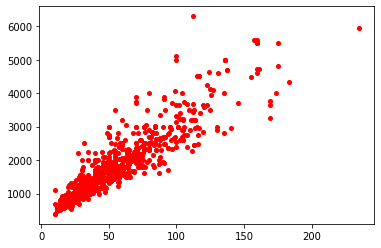

In [9]:
plt.plot(house_data['surface'], house_data['price'], 'ro', markersize=4)
plt.show

In [4]:
# traitement : il y a des cases vides dans certaines lignes
house_data = house_data.dropna() 

In [5]:
# suppression des outliers "hauts"
house_data = house_data[house_data['price'] < 6500]

<function matplotlib.pyplot.show(*args, **kw)>

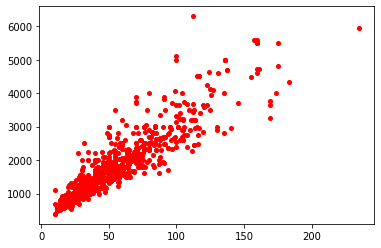

In [6]:
plt.plot(house_data['surface'], house_data['price'], 'ro', markersize=4)
plt.show

In [7]:
# régression linéaire en fonction de la surface seulement, comme initialement dans le cours
X_train, X_test, y_train, y_test = train_test_split(house_data['surface'], house_data['price'], train_size=0.8)

X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print("y_prédit = {:.1f} + {:.1f} * surface".format(regr.intercept_[0], regr.coef_[0][0]))

X_test = np.array(X_test).reshape(-1,1)
y_pred = regr.predict(X_test)

print("Pourcentage d'erreur : {}".format(1-regr.score(X_test, y_test)))

y_prédit = 347.6 + 26.9 * surface
Pourcentage d'erreur : 0.1245959494160338


Loyers en fonction de la surface dans l'arrondissement 1
y_prédit = 526.9 + 26.4 * surface
Pourcentage d'erreur : 0.257


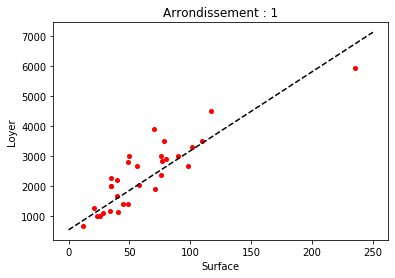

Loyers en fonction de la surface dans l'arrondissement 2
y_prédit = 211.2 + 30.5 * surface
Pourcentage d'erreur : 0.113


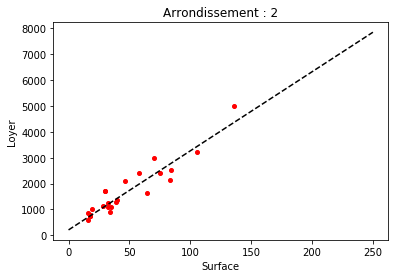

Loyers en fonction de la surface dans l'arrondissement 3
y_prédit = 337.2 + 27.4 * surface
Pourcentage d'erreur : 0.108


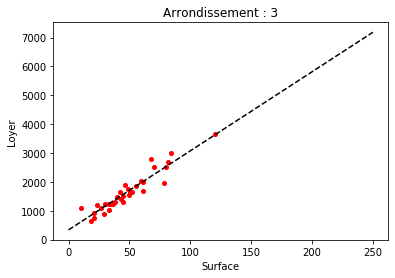

Loyers en fonction de la surface dans l'arrondissement 4
y_prédit = 282.4 + 29.4 * surface
Pourcentage d'erreur : 0.110


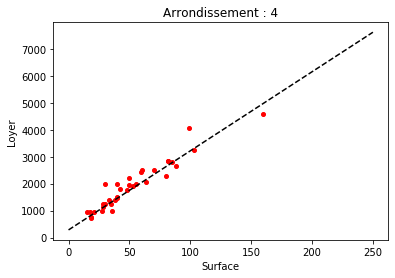

Loyers en fonction de la surface dans l'arrondissement 10
y_prédit = 386.5 + 19.9 * surface
Pourcentage d'erreur : 0.055


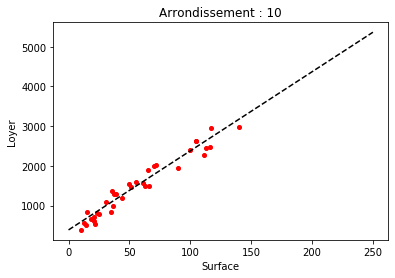

In [8]:
# au lieu d'un seul modèle, création d'un modèle par arrondissement

house_data['arrondissement'].unique()

n_arrondissement = [1,2,3,4,10]

for k in n_arrondissement:
    print("Loyers en fonction de la surface dans l'arrondissement {}".format(k))
    
    # régression linéaire :
    X_train, X_test, y_train, y_test = train_test_split(house_data[house_data['arrondissement']==k]['surface'], house_data[house_data['arrondissement']==k]['price'], train_size=0.8)
    X_train = np.array(X_train).reshape(-1,1)
    y_train = np.array(y_train).reshape(-1,1)
    
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    print("y_prédit = {:.1f} + {:.1f} * surface".format(regr.intercept_[0], regr.coef_[0][0]))

    X_test = np.array(X_test).reshape(-1,1)
    y_pred = regr.predict(X_test)
    print("Pourcentage d'erreur : {:.3f}".format(1-regr.score(X_test, y_test)))
    
    #affichage des données tests et de la droite de régression
    plt.plot(X_test, y_test, 'ro', markersize=4)
    plt.plot([0,250], [regr.intercept_[0], regr.intercept_[0] + regr.coef_[0][0] * 250], linestyle='--', c='#000000')
    plt.title('Arrondissement : %i' % k)
    plt.xlabel('Surface')
    plt.ylabel('Loyer')
    plt.show()